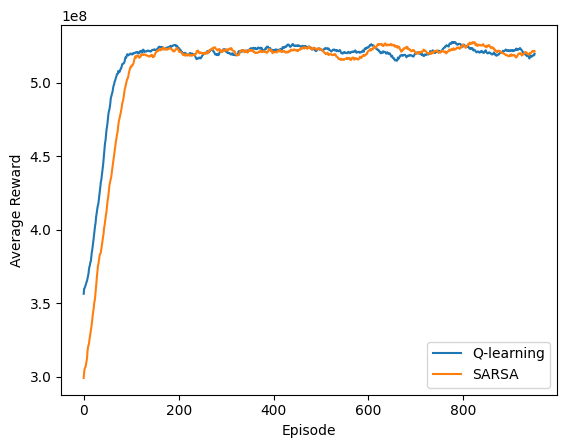

In [1]:
import numpy as np

# Define the state space
state_space = [2199750, 2199750, 5520000,5520000, 5520000, 5520000,
               5740000, 5883500, 5883500,6084400, 6114400, 6572550, 7314000]
# Define the action space
action_space = [0, 1, 2]

# Define the reward function
def reward(state, action):
    if action == 0:
        return 0
    else:
        return state

# Set hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 0.1

# Define function to run an episode
def run_episode(q_table):
    # Choose initial state
    state = np.random.choice(state_space)

    # Initialize total reward for episode
    total_reward = 0

    # Loop over time steps in episode
    for t in range(100):
        # Choose action using epsilon-greedy policy
        if np.random.uniform() < epsilon:
            action = np.random.choice(action_space)
        else:
            action = np.argmax(q_table[state_space.index(state), :])

        # Update Q-value for current state-action pair
        next_state = np.random.choice(state_space)
        reward_current = reward(state, action)
        q_table[state_space.index(state), action_space.index(action)] += alpha * (reward_current + gamma * np.max(q_table[state_space.index(next_state), :]) - q_table[state_space.index(state), action_space.index(action)])

        # Update total reward for episode
        total_reward += reward_current

        # Update state for next time step
        state = next_state

    return total_reward

# Initialize Q-tables for Q-learning and SARSA
q_table_q = np.zeros((len(state_space), len(action_space)))
q_table_s = np.zeros((len(state_space), len(action_space)))

# Run multiple episodes and calculate average reward for each algorithm
num_episodes = 1000
total_reward_q = []
total_reward_s = []

for i in range(num_episodes):
    total_reward_q.append(run_episode(q_table_q))
    total_reward_s.append(run_episode(q_table_s))

# Calculate moving average of rewards over time
window_size = 50
moving_avg_q = np.convolve(total_reward_q, np.ones(window_size)/window_size, mode='valid')
moving_avg_s = np.convolve(total_reward_s, np.ones(window_size)/window_size, mode='valid')

# Plot moving average of rewards over time for both algorithms
import matplotlib.pyplot as plt

plt.plot(moving_avg_q)
plt.plot(moving_avg_s)
plt.legend(['Q-learning', 'SARSA'])
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.show()